In [8]:
#first get the python modules we need
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.convolution import convolve, Box1DKernel
from astropy.table import Table
import astropy.units as u
from scipy.io import readsav
from scipy.interpolate import interpolate


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
idl_files = glob.glob('*.sav')
idl_files

['TRAPPIST1_G160M_all_NOSCL_Mm1_11nov2019.sav',
 'TRAPPIST1_G130M_Mm1_NOSCL_10dec2018.sav']

In [3]:
g130m = readsav(idl_files[1])

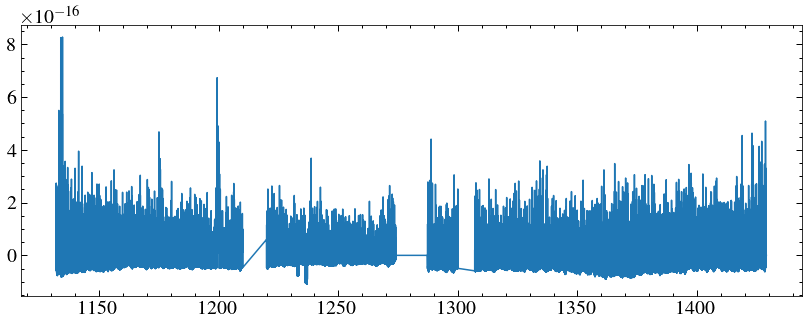

In [13]:
mask = (g130m['wave'] < 1210) | (g130m['wave'] > 1220) & (g130m['wave'] < 1300) | (g130m['wave'] > 1307)
w, f, e =  g130m['wave'][mask], g130m['flux'][mask], g130m['err'][mask]
plt.plot(w,f)

In [14]:
from astropy.timeseries import LombScargle

(0, 0.05)

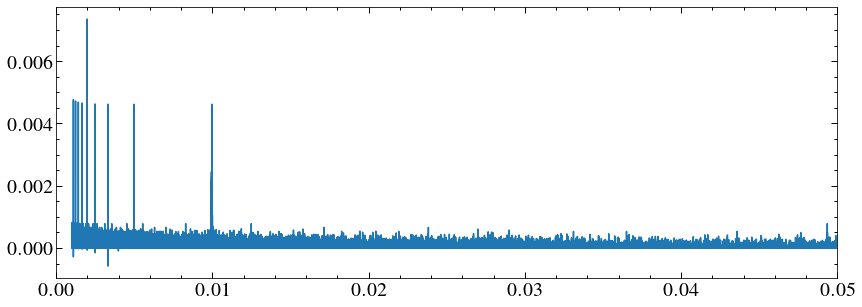

In [24]:
frequency, power = LombScargle(w, f).autopower(samples_per_peak=10, minimum_frequency = 1, maximum_frequency = 1/0.001)
plt.plot(1/frequency, power)
plt.xlim(0, 0.05)

Thats' just the sampling. Oh well.